In [21]:
import warnings
import os
import json
import sys
import datetime
start_timestamp = datetime.datetime.now()

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

# from trips_count_predictor.city_loader.city_loader import CityLoader

warnings.simplefilter(action='ignore')

In [22]:
import os
root = '/Users/mc/Desktop/IEEE_ACM_DS_RT_2020/'
data_path = os.path.join(root, 'Data', 'Minneapolis')
trips = pd.DataFrame()
for file in os.listdir(data_path):
    if 'csv' in file:
        trips = trips.append(pd.read_csv(os.path.join(data_path, file)))
    else:
       geo = gpd.read_file("MPLS_Centerline/MPLS_Centerline.dbf") 
trips.shape

(563458, 10)

In [23]:
# city_loader = CityLoader("Minneapolis")
# trips = city_loader.load_raw_trips_data("city_of_minneapolis", 2019, 5)

In [24]:
trips.columns

Index(['TripID', 'TripDuration', 'TripDistance', 'StartTime', 'EndTime',
       'StartCenterlineID', 'StartCenterlineType', 'EndCenterlineID',
       'EndCenterlineType', 'ObjectId'],
      dtype='object')

In [17]:
trips.head()

,TripID,TripDuration,TripDistance,StartTime,EndTime,StartCenterlineID,StartCenterlineType,EndCenterlineID,EndCenterlineType,ObjectId
0,177251,249,810,2019-07-01T18:00:00.000Z,2019-07-01T18:00:00.000Z,16614.00,street,17053.00,street,1001
1,177262,440,1371,2019-07-01T18:00:00.000Z,2019-07-01T18:00:00.000Z,18749.00,street,17317.00,street,1002
2,177266,334,607,2019-07-01T18:00:00.000Z,2019-07-01T18:00:00.000Z,16615.00,street,19244.00,street,1003
3,177268,751,3292,2019-07-01T18:00:00.000Z,2019-07-01T18:30:00.000Z,11279.00,street,0A7745DD-4328-4460-A945-DC4E2FC05B14,trail,1004
4,177272,899,3908,2019-07-01T18:00:00.000Z,2019-07-01T18:30:00.000Z,12676ACC-202B-4EFF-A91F-C28307D4783C,trail,10323.00,street,1005


In [18]:
trips.StartCenterlineID.describe()

count     519357.0
unique     14568.0
top        18754.0
freq        4000.0
Name: StartCenterlineID, dtype: float64

In [19]:
geo = gpd.read_file("MPLS_Centerline/MPLS_Centerline.dbf")

OSError: no such file or directory: 'MPLS_Centerline/MPLS_Centerline.dbf'

In [7]:
geo.columns

Index(['OBJECTID', 'L_F_ADD', 'R_F_ADD', 'L_T_ADD', 'R_T_ADD', 'STREETALL',
       'F_CLASS', 'ALT_NAM1', 'ALT_NAM2', 'ZIP5_L', 'ZIP5_R', 'CITYLEFT',
       'CITYRIGT', 'PREDIR', 'STREETNAME', 'TYPE', 'SUFDIR', 'SPEED_LIM',
       'HIGHWAY_NU', 'ALT_ID', 'GBSID', 'COUNTYRIGT', 'COUNTYLEFT', 'ONEWAY',
       'MSLINK', 'F_XSTREET_', 'F_XSTREE_1', 'F_XSTREE_2', 'T_XSTREET_',
       'T_XSTREE_1', 'T_XSTREE_2', 'GlobalID', 'FromLanes', 'ToLanes',
       'Shape__Len', 'geometry'],
      dtype='object')

In [8]:
geo.geometry

0        LINESTRING (-93.22942744349589 45.022275207595...
1        LINESTRING (-93.2088210065463 44.9483483888007...
2        LINESTRING (-93.2906603829404 44.9466004345999...
3        LINESTRING (-93.28190704121729 45.016681894096...
4        LINESTRING (-93.21779006740771 44.904471030025...
                               ...                        
13832    LINESTRING (-93.2895372640139 44.9779427242907...
13833    LINESTRING (-93.26284350342991 44.970281621377...
13834    LINESTRING (-93.2953764258273 44.9759943674039...
13835    LINESTRING (-93.2953764258273 44.9759943674039...
13836    LINESTRING (-93.2954369430602 44.974047984322,...
Name: geometry, Length: 13837, dtype: object

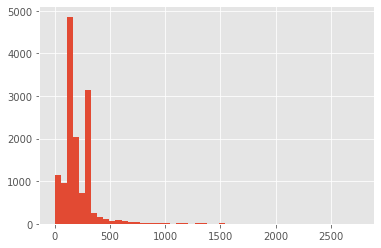

In [10]:
geo.geometry.to_crs({"init":"epsg:3857"}).length.hist(bins=50)

In [11]:
geo.geometry.apply(lambda x: len(x.coords))

0         2
1         7
2         2
3         4
4         2
         ..
13832     2
13833     2
13834     8
13835    17
13836     6
Name: geometry, Length: 13837, dtype: int64

(array([-93.296  , -93.29575, -93.2955 , -93.29525]),
 <a list of 4 Text xticklabel objects>)

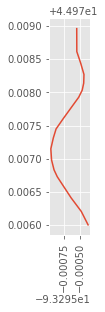

In [12]:
geo.iloc[13835:13836].plot()
plt.xticks(rotation="vertical")

In [13]:
def get_random_point_from_linestring (linestring):
    linestring_coords = linestring.coords
    segment_index = np.random.randint(0, len(linestring_coords)-1)
    random_segment = LineString([
        Point(linestring_coords[segment_index]), 
        Point(linestring_coords[(segment_index+1)])
    ])
    u = np.random.rand()
    x1, x2 = random_segment.coords[0][0], random_segment.coords[1][0]
    y1, y2 = random_segment.coords[0][1], random_segment.coords[1][1]
    random_x = (1-u)*x1 + u*x2
    random_y = (1-u)*y1 + u*y2
    random_point = Point(random_x, random_y)
    random_segment.__str__(), random_point.__str__(), random_segment.distance(random_point) < 1e-10
    return random_point

In [14]:
geo.GBSID.describe()

count    13837.000000
mean     17177.483992
std       4348.836010
min      10001.000000
25%      13482.000000
50%      17011.000000
75%      20554.000000
max      26152.000000
Name: GBSID, dtype: float64

In [15]:
trips["start_GBSID"] = trips.StartCenterlineID

In [16]:
trips_origins = gpd.GeoDataFrame(pd.merge(
    trips, geo, left_on="StartCenterlineID", right_on="GBSID"
)).sample(frac=1)
trips_destinations = gpd.GeoDataFrame(pd.merge(
    trips, geo, left_on="EndCenterlineID", right_on="GBSID"
)).sample(frac=1)

In [17]:
%%time
trips_origins.geometry = trips_origins.geometry.apply(get_random_point_from_linestring)
trips_destinations.geometry = trips_destinations.geometry.apply(get_random_point_from_linestring)

CPU times: user 17.2 s, sys: 8 ms, total: 17.2 s
Wall time: 17.2 s


In [18]:
trips_origins.columns

Index(['TripID', 'TripDuration', 'TripDistance', 'StartTime', 'EndTime',
       'StartCenterlineID', 'StartCenterlineType', 'EndCenterlineID',
       'EndCenterlineType', 'ObjectId', 'start_GBSID', 'OBJECTID', 'L_F_ADD',
       'R_F_ADD', 'L_T_ADD', 'R_T_ADD', 'STREETALL', 'F_CLASS', 'ALT_NAM1',
       'ALT_NAM2', 'ZIP5_L', 'ZIP5_R', 'CITYLEFT', 'CITYRIGT', 'PREDIR',
       'STREETNAME', 'TYPE', 'SUFDIR', 'SPEED_LIM', 'HIGHWAY_NU', 'ALT_ID',
       'GBSID', 'COUNTYRIGT', 'COUNTYLEFT', 'ONEWAY', 'MSLINK', 'F_XSTREET_',
       'F_XSTREE_1', 'F_XSTREE_2', 'T_XSTREET_', 'T_XSTREE_1', 'T_XSTREE_2',
       'GlobalID', 'FromLanes', 'ToLanes', 'Shape__Len', 'geometry'],
      dtype='object')

In [19]:
trips_origins.index

Int64Index([21344,  5675, 11798, 17765,   210, 16519, 32308, 24615, 24094,
            30188,
            ...
            13094, 11699,  6992,  8655, 29699, 28023, 31641, 20546, 19553,
            33390],
           dtype='int64', length=35199)

In [20]:
trips_origins.geometry.head()

21344    POINT (-93.23682110696068 44.96096242276697)
5675     POINT (-93.28416659682428 44.97398843250631)
11798     POINT (-93.2556787535482 44.97680746745269)
17765    POINT (-93.27791451342199 44.93970688098515)
210      POINT (-93.27591078885284 44.98034688016465)
Name: geometry, dtype: object

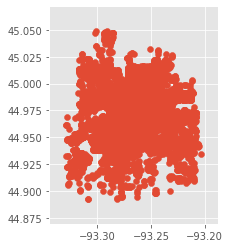

In [21]:
trips_origins.plot()

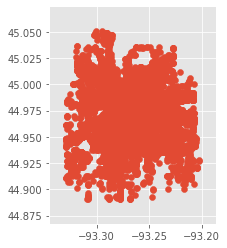

In [22]:
trips_destinations.plot()